<a href="https://colab.research.google.com/github/utrionedv/matstat_kursa4/blob/main/%D0%BF%D1%801_%D0%B1%D1%83%D0%B4%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Для целочисленных данных необходимо:

Построить вариационный ряд с абсолютными и относительными частотами по выборке дискретных данных

In [ ]:
df = pd.read_csv("/content/1.txt")

intData = df['randomNum']
int_Data = intData
intData

,randomNum
0,4
1,1
2,4
3,0
4,1
5,7
6,8
7,5
8,7
9,1


In [ ]:
intData = intData.sort_values().reset_index(drop = True)

intData = intData.value_counts()
intData = intData.sort_index()
intCounts = intData.value_counts()
intCounts = intData.sort_index()
intData = pd.DataFrame({
    'Абсолютная частота': intData,
    'Относительная частота': intData/intData.sum(),
})
intData


,Абсолютная частота,Относительная частота
randomNum,,
0,2,0.071429
1,4,0.142857
2,1,0.035714
3,4,0.142857
4,4,0.142857
5,4,0.142857
6,4,0.142857
7,3,0.107143
8,2,0.071429


 Построить полигон относительных частот вариационного ряда

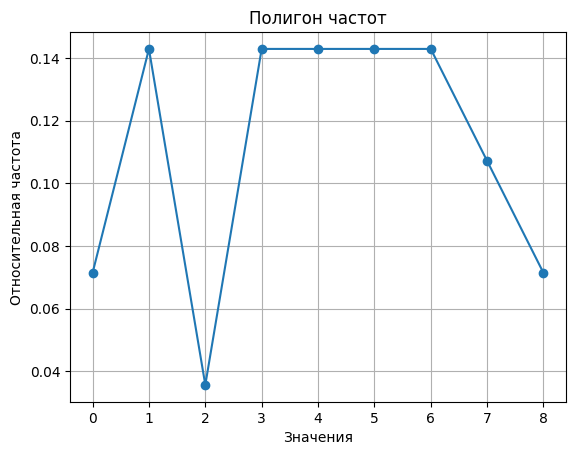

In [ ]:
plt.plot(range(len(intData)), intData['Относительная частота'], marker='o', linestyle='-',)
plt.title('Полигон частот')
plt.xlabel('Значения')
plt.ylabel('Относительная частота')
plt.grid()
plt.show()

Выписать выражение для эмпирической функции распределения
и построить её график

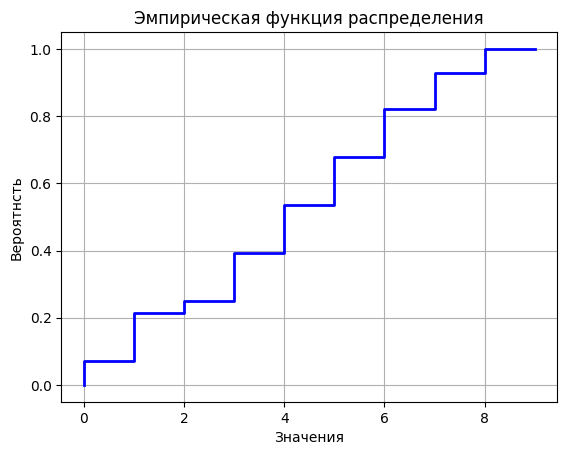

In [ ]:
EFR = pd.DataFrame(columns=['Values'])
EFR.loc[intCounts.index[0]] = 0

for i in range (1,len(intCounts)+1):
  EFR.loc[i] = intCounts[i - 1] + EFR.iloc[i - 1, 0]
EFR = EFR['Values'] / intCounts.sum()
plt.step(EFR.index, EFR, color='blue', linewidth=2)
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значения')
plt.ylabel('Вероятнсть')
plt.grid()
plt.show()

Рассчитать выборочные описательные статистики:

*   выборочное среднее
*   выборочную дисперсию
*   выборочное стандартное отклонение
*   выборочную медиану
*   коэффициент вариации

In [ ]:
print('Выборочное среднее: ', int_Data.mean())

print('Выборочная дисперсия: ', int_Data.var())

print('Выборочное стандартное отклонение: ', int_Data.std())

# print('Выборочная медиана: ', int_Data.median())

print('Коэффициент вариации: ', ((int_Data.std() / int_Data.mean()) * 100))


Выборочное среднее:  4.107142857142857
Выборочная дисперсия:  5.72883597883598
Выборочное стандартное отклонение:  2.393498689959111
Коэффициент вариации:  58.276489842482704


## Для вещественных (непрерывных) данных необходимо:

Рассчитать число групп (интервалов)  m для квантования исходных
данных по правилу Стёрджесса

In [ ]:
df = pd.read_csv("/content/1.txt")

realData = df['height']
realData

,height
0,173.0
1,187.0
2,183.0
3,173.0
4,169.0
5,182.0
6,184.0
7,178.0
8,183.0
9,186.0


In [ ]:
df = pd.read_csv("/content/1.txt")

realData = df['height']

m = round(1 + 3.332 * (np.log10(len(realData))))
print('Число интервалов m: ', m)
xmax = realData.max()
xmin = realData.min()
h = (xmax-xmin)/m
print('Длина интервала h:  ', h)

Число интервалов m:  6
Длина интервала h:   4.666666666666667


Вычислить значения m+1 границ групп для значений выборки по
правилу фиксированной величины интервала

In [ ]:

intervals = pd.DataFrame(columns=['Start','End'])
i = 0
xstart = xmin - h/2
while i <= m:
  intervals.loc[len(intervals)] = [xstart, xstart + h]
  xstart = xstart + h
  i += 1
print('Значение границ групп: ')
print(intervals)

Значение границ групп: 
        Start         End
0  160.666667  165.333333
1  165.333333  170.000000
2  170.000000  174.666667
3  174.666667  179.333333
4  179.333333  184.000000
5  184.000000  188.666667
6  188.666667  193.333333


Построить вариационный ряд для выборки интервальных данных

In [ ]:
realData = realData.sort_values().reset_index(drop = True)
realData

,height
0,163.0
1,165.0
2,165.0
3,168.0
4,169.0
5,170.0
6,170.0
7,170.0
8,172.0
9,173.0


Построить гистограмму распределения относительных частот для
рассчитанных интервалов выборки

                   n         w
160.667 - 165.333  3  0.107143
165.333 - 170.0    2  0.071429
170.0 - 174.667    8  0.285714
174.667 - 179.333  2  0.071429
179.333 - 184.0    6  0.214286
184.0 - 188.667    6  0.214286
188.667 - 193.333  1  0.035714


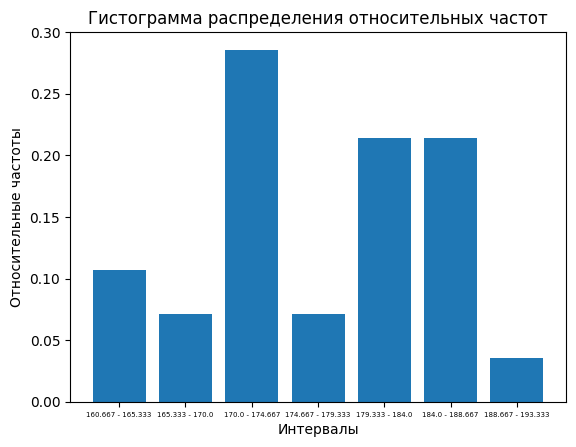

In [ ]:
realCount = pd.DataFrame(columns=['n'])
new_index = []
for ind, row in intervals.iterrows():
  realCount.loc[len(realCount)] = ((realData >= row['Start']) & (realData < row['End'])).sum()
  new_index.append(str(round(row['Start'],3)) + ' - ' + str((round(row['End'],3))))
realCount.index = new_index
realCount['w'] = realCount['n'] / realCount['n'].sum()
print(realCount)
plt.bar(realCount.index, realCount['w'], width=0.8)
plt.xlabel('Интервалы')
plt.ylabel('Относительные частоты')
plt.title('Гистограмма распределения относительных частот')
plt.tick_params(axis='x', labelsize=5)
plt.show()

Выписать выражение для эмпирической функции распределения,
построить её график

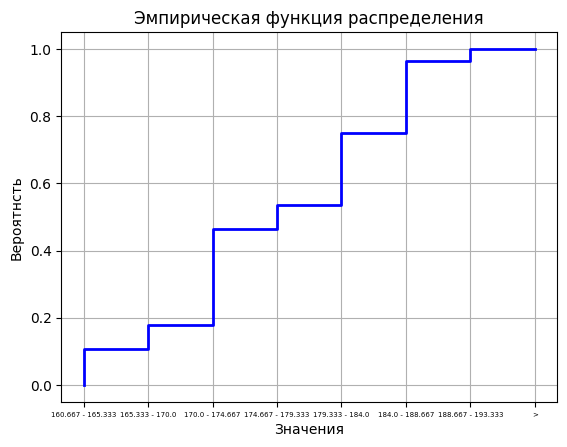

In [ ]:
realCount = realCount.cumsum()
realCount.loc['>']=[0,0]
realCount['w'] = realCount['w'].shift(1)
realCount.iloc[0,1]=0
plt.step(realCount.index, realCount['w'], color='blue', linewidth=2)
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значения')
plt.ylabel('Вероятнсть')
plt.tick_params(axis='x', labelsize=5)
plt.grid()
plt.show()

Рассчитать выборочные описательные статистики:

*   выборочное среднее
*   выборочную дисперсию
*   выборочное стандартное отклонение
*   выборочную медиану
*   коэффициент вариации

In [ ]:
print('Выборочное среднее: ', realData.mean())

print('Выборочная дисперсия: ', realData.var())

print('Выборочное стандартное отклонение: ', realData.std())

# print('Выборочная медиана: ', realData.median())

print('Коэффициент вариации: ', ((realData.std() / realData.mean()) * 100))


Выборочное среднее:  176.79999999999998
Выборочная дисперсия:  61.071851851851854
Выборочное стандартное отклонение:  7.814848165630082
Коэффициент вариации:  4.420162989609775
